# KYC App

In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io
import os
import base64
# Imports the Google Cloud client library
# [START vision_python_migration_import]
from google.cloud import vision
from google.cloud.vision import types

ImportError: No module named 'google.cloud'

In [14]:
import all_in_one as demo
kyc_presenter = demo.KYC()

In [1]:
aadhaar_document_extraction_ip = '34.66.196.48:8080'
aadhaar_text_strip_extraction_ip = '34.66.196.48:8081'
document_classifier_ip = '34.66.196.48:8082'
document_orientation_classifier_ip = '34.66.196.48:8083'
pan_document_extraction_ip = '34.66.196.48:8084'
pan_text_strip_extraction_ip = '34.66.196.48:8085'
kyc_presenter.ip_dict = {'aadhaar_document_extraction':aadhaar_document_extraction_ip,
                         'aadhaar_text_strip_extraction':aadhaar_text_strip_extraction_ip,
                         'document_classifier':document_classifier_ip,
                         'document_orientation_classifier':document_orientation_classifier_ip,
                         'pan_document_extraction':pan_document_extraction_ip,
                         'pan_text_strip_extraction':pan_text_strip_extraction_ip
                        }

NameError: name 'kyc_presenter' is not defined

In [16]:
kyc_presenter.class_mappings = {'document_orientation_classifier':None,
 'document_classifier':None,
 'aadhaar_text_strip_extraction':None,
 'aadhaar_document_extraction':{'1':"aadhar_half_front", '2':"aadhar_half_back"},
 'pan_text_strip_extraction':None,
 'pan_document_extraction': {'1':"pan_front"}}

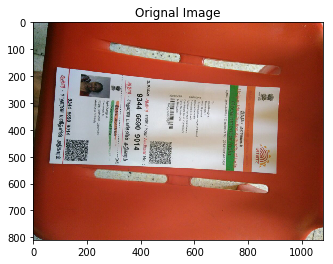

In [22]:
aadhaar_image = "/home/amank/Documents/datasets/instance_segmentation_vishnu/aadhar1_files/train/57a1abb2381884122b3cf91e.jpg"
voter_image = '/home/amank/Documents/datasets/imgdata/VOTERID/VoterId1.jpg'
pan_image = "/home/amank/Documents/datasets/instance_segmentation_vishnu/pan_dataset/val/.jpg"

rotated_aadhaar_image = '/home/amank/Documents/datasets/instance_segmentation_vishnu/aadhar1_files/train/57e8d6b52c7587f3f25f717c.jpg'
rotated_aadhar_image_1 ='/home/madhevan/Reorient_Dataset/Validate/FlipRight/Aadhaar_52.jpg'
rotated_aadhar_image_2 ='/home/madhevan/Reorient_Dataset/Validate/FlipLeft/Aadhaar_35.jpg'
rotated_aadhar_image_3 ='/home/madhevan/Reorient_Dataset/Validate/Inverted/Aadhaar_21_inv.jpg'
rotated_pan_image_1 = '/home/madhevan/Reorient_Dataset/Validate/Inverted/148317904667110098477502.jpg'
rotated_pan_image_2 = '/home/madhevan/Reorient_Dataset/Validate/FlipRight/146642622851117737498360.jpg'
rotated_pan_image_2 = '/home/madhevan/Reorient_Dataset/Validate/Inverted/148283065714521097483266.jpg'

#rotated_image_left = 
image_path = rotated_aadhar_image_2
plt.title('Orignal Image')
orignal_image = Image.open(image_path)
plt.imshow(orignal_image)

In [23]:
parsed_image_dict = kyc_presenter.parse_image(image_path, orientation_correction=True, classify=False, class_name='aadhaar')

In [1]:
parsed_image_dict

NameError: name 'parsed_image_dict' is not defined

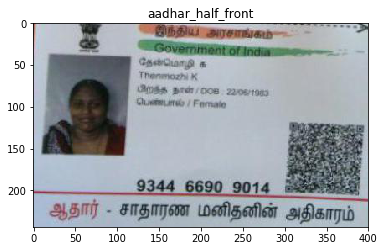

In [24]:
for mask in parsed_image_dict['masks']:
    base64_image = parsed_image_dict['masks'][mask]
    image = kyc_presenter._base64_to_numpy_array_(base64_image)
    plt.title(mask)
    plt.imshow(image)

In [25]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])
def plot_strips_with_title(title):
    documents = list(parsed_image_dict['masks'].keys())
    for document in documents:
        if document in parsed_image_dict:
            strips = parsed_image_dict[document]
            imgs = [kyc_presenter._base64_to_numpy_array_(parsed_image_dict[document][strip]) for strip in strips]
            strip_titles = [strip_name for strip_name in strips]
            print(title)
    return plots(imgs, rows=1, titles=strip_titles, figsize=(16,8))

All the metadata of aadhaar


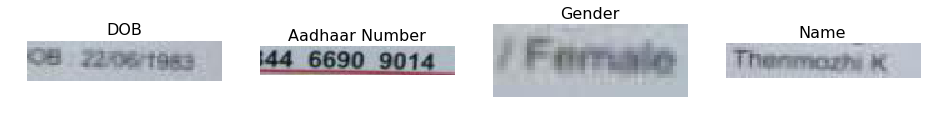

In [26]:
plot_strips_with_title("All the metadata of {}".format(parsed_image_dict['class_name']))

In [28]:
def get_text_from_strip_google_ocr(binary_image_file):
    
    # [START vision_quickstart]
    
    # [END vision_python_migration_import]

    # Instantiates a client
    # [START vision_python_migration_client]
    client = vision.ImageAnnotatorClient()
    # [END vision_python_migration_client]

#     # The name of the image file to annotate
#     file_name = os.path.join(
#         os.path.dirname(__file__),
#         'ima')

#     # Loads the image into memory
#     with io.open(file_name, 'rb') as image_file:
#         content = image_file.read()
    content = binary_image_file
    image = types.Image(content=content)

    # Performs label detection on the image file
    
    response = client.text_detection(image=image)
    texts = response.text_annotations

    print(texts)
    # [END vision_quickstart]

In [29]:
documents = list(parsed_image_dict['masks'].keys())
for document in documents:
    strips = parsed_image_dict[document]
    for strip in strips:
        image = base64.b64decode(parsed_image_dict[document][strip])
        get_text_from_strip_google_ocr(image)            

KeyError: 'aadhar_half_back'

In [46]:
str(base64.b64encode(open('/home/amank/Documents/datasets/instance_segmentation_vishnu/aadhar1_files/val/57b84f86202a5631510716a3.jpg', 'rb').read()))[2:-1]

'/9j/4AAQSkZJRgABAQEAZABkAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCASRA1IDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAo

In [27]:
import requests
cheque_url = 'http://192.168.2.97:5000/api/cheque_micr_extract'
    cheque_path = '/home/madhevan/Cheques1/300/Cheque 083654.tif'
data = {'image':str(base64.b64encode(open(cheque_path, 'rb').read()))[2:-1]}
response = requests.post(cheque_url, json=data)
response.json()

{'account_number': '290062',
 'cheque_number': '083654',
 'micr_code': '500025033',
 'transaction_id': '31'}

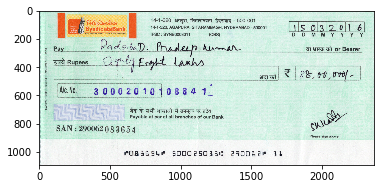

In [28]:
orignal_image = Image.open(cheque_path)
plt.imshow(orignal_image)